<a href="https://colab.research.google.com/github/krsna540/Hackthons/blob/master/Cartooons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from skimage import io
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set(style='darkgrid')
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
path='/content/drive/My Drive/Colab Notebooks/Emotion_Dataset'

# Any results you write to the current directory are saved as output.

In [35]:
traindf=pd.read_csv(path+"/Train.csv")
traindf.shape

(298, 2)

In [36]:
#To CHeck 
traindf.isnull().sum().sum()

0

In [37]:
traindf.head()

,Frame_ID,Emotion
0,frame0.jpg,happy
1,frame1.jpg,happy
2,frame2.jpg,surprised
3,frame3.jpg,surprised
4,frame4.jpg,angry


In [38]:
traindf.Emotion[2]

'surprised'

In [0]:
emotion_cat=traindf.Emotion.unique()

In [40]:
emotion_cat

array(['happy', 'surprised', 'angry', 'Unknown', 'sad'], dtype=object)

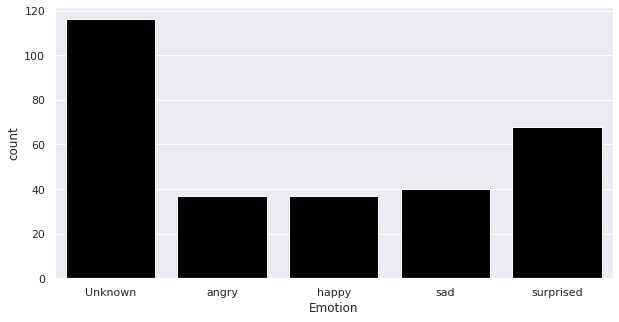

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='Emotion', data=traindf,
                   order=list(traindf['Emotion'].value_counts().sort_index().index) ,
                   color='black')

In [42]:
trainpath=path+"/train/"
for foldername in emotion_cat:
  newpath = trainpath+str(foldername)
  try:
    os.mkdir(newpath)
  except OSError:
    print ("Creation of the directory %s failed" % newpath)
  else:
    print ("Successfully created the directory %s " % newpath)

Successfully created the directory /content/drive/My Drive/Colab Notebooks/Emotion_Dataset/train/happy 
Successfully created the directory /content/drive/My Drive/Colab Notebooks/Emotion_Dataset/train/surprised 
Successfully created the directory /content/drive/My Drive/Colab Notebooks/Emotion_Dataset/train/angry 
Successfully created the directory /content/drive/My Drive/Colab Notebooks/Emotion_Dataset/train/Unknown 
Successfully created the directory /content/drive/My Drive/Colab Notebooks/Emotion_Dataset/train/sad 


In [0]:
def get_CategoryFolderName(count,path):
  foldername=traindf.Emotion[count]
  return trainpath+"/"+str(foldername)

In [0]:
import cv2
vidcap = cv2.VideoCapture(path+'/Train Tom and jerry.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
      folderpath=get_CategoryFolderName(count,path)
      imagename="frame"+str(count)+".jpg"
      cv2.imwrite(os.path.join(folderpath , imagename), image)
      #cv2.imwrite("frame"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 1 #//it will capture image in each 5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    try:
      success = getFrame(sec)
    except:
      success=False
    else:
      success = getFrame(sec)


In [45]:
happy_dir = os.path.join(trainpath+'/happy')
surprised_dir = os.path.join(trainpath+'/surprised')
angry_dir = os.path.join(trainpath+'/angry')
Unknown_dir = os.path.join(trainpath+'/Unknown')
sad_dir = os.path.join(trainpath+'/sad')

print('Total training happy images:', len(os.listdir(happy_dir)))
print('Total training surprised images:', len(os.listdir(surprised_dir)))
print('Total training angry images:', len(os.listdir(angry_dir)))
print('Total training Unknown images:', len(os.listdir(Unknown_dir)))
print('Total training sad images:', len(os.listdir(sad_dir)))

Total training happy images: 36
Total training surprised images: 68
Total training angry images: 37
Total training Unknown images: 116
Total training sad images: 40


In [0]:
X=[]
Z=[]
IMG_SIZE=150
def assign_label(img,emotion_type):
    return emotion_type
    

In [0]:
def make_train_data(emotion_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,emotion_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [57]:
make_train_data('happy',happy_dir)
make_train_data('surprised',surprised_dir)
make_train_data('angry',angry_dir)
make_train_data('Unknown',Unknown_dir)
make_train_data('sad',sad_dir)

print(len(X))

100%|██████████| 40/40 [00:00<00:00, 60.03it/s]

297


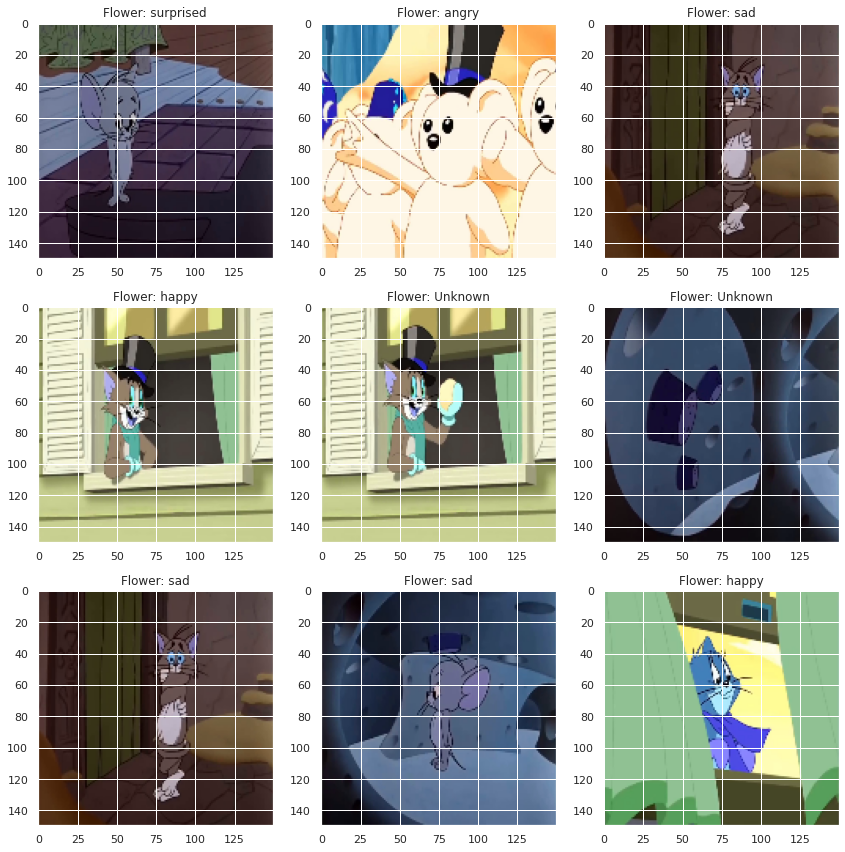

In [63]:
import random as rn
fig,ax=plt.subplots(3,3)
fig.set_size_inches(12,12)
for i in range(3):
    for j in range (3):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [0]:
# Label Encoding the emotion categories & then One Hot Encoding
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [0]:
import tensorflow as tf
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [72]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [0]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [75]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 96)       

In [77]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





1/1 [==============================] - 7s 7s/step - loss: 1.6058 - acc: 0.1383 - val_loss: 1.7219 - val_acc: 0.3467
Epoch 2/50
1/1 [==============================] - 8s 8s/step - loss: 1.6206 - acc: 0.4375 - val_loss: 1.5367 - val_acc: 0.3333
Epoch 3/50
1/1 [==============================] - 7s 7s/step - loss: 1.5673 - acc: 0.3047 - val_loss: 1.5118 - val_acc: 0.3467
Epoch 4/50
1/1 [==============================] - 6s 6s/step - loss: 1.4687 - acc: 0.4255 - val_loss: 1.5023 - val_acc: 0.3467
Epoch 5/50
1/1 [==============================] - 7s 7s/step - loss: 1.4779 - acc: 0.3906 - val_loss: 1.4554 - val_acc: 0.3467
Epoch 6/50
1/1 [==============================] - 6s 6s/step - loss: 1.4169 - acc: 0.4255 - val_loss: 1.4317 - val_acc: 0.3333
Epoch 7/50
1/1 [==============================] - 5s 5s/step - loss: 1.3229 - acc: 0.4468 - val_loss: 1.4410 - val_acc: 0.3600
Epoch 8/5

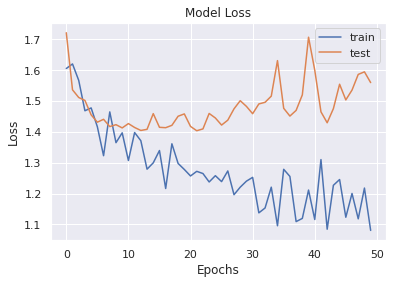

In [78]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

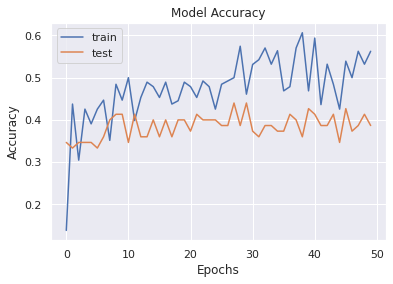

In [79]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [0]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

ValueError: ignored

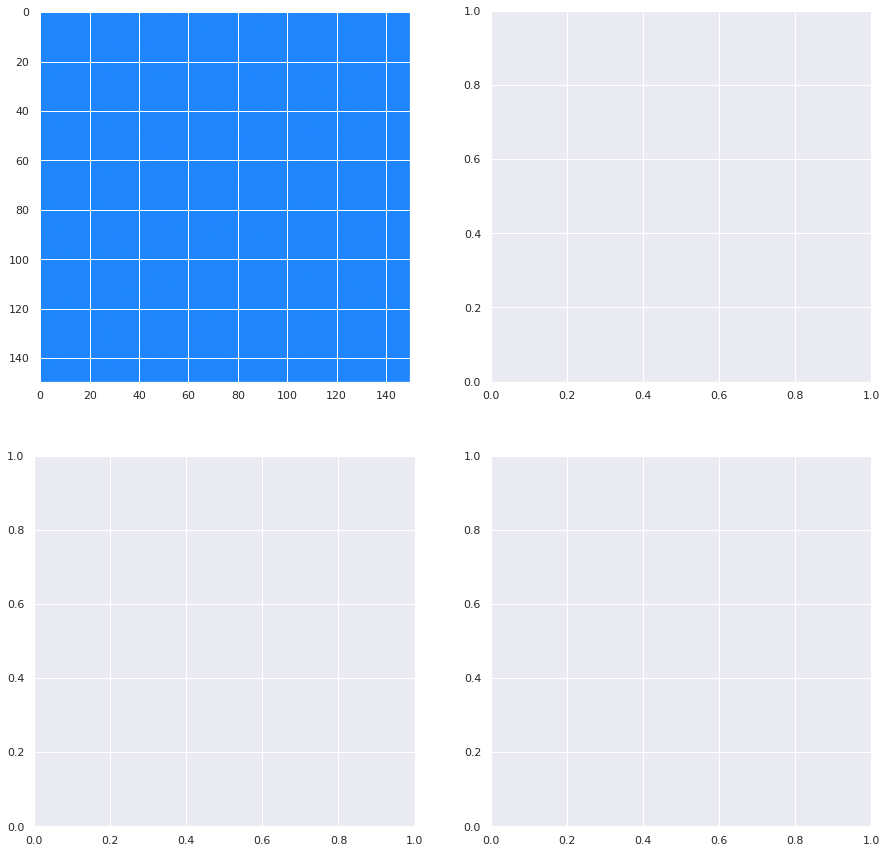

In [86]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(2,2)
fig.set_size_inches(15,15)
for i in range (2):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[prop_class[count]]]))))
        plt.tight_layout()
        count+=1

ValueError: ignored

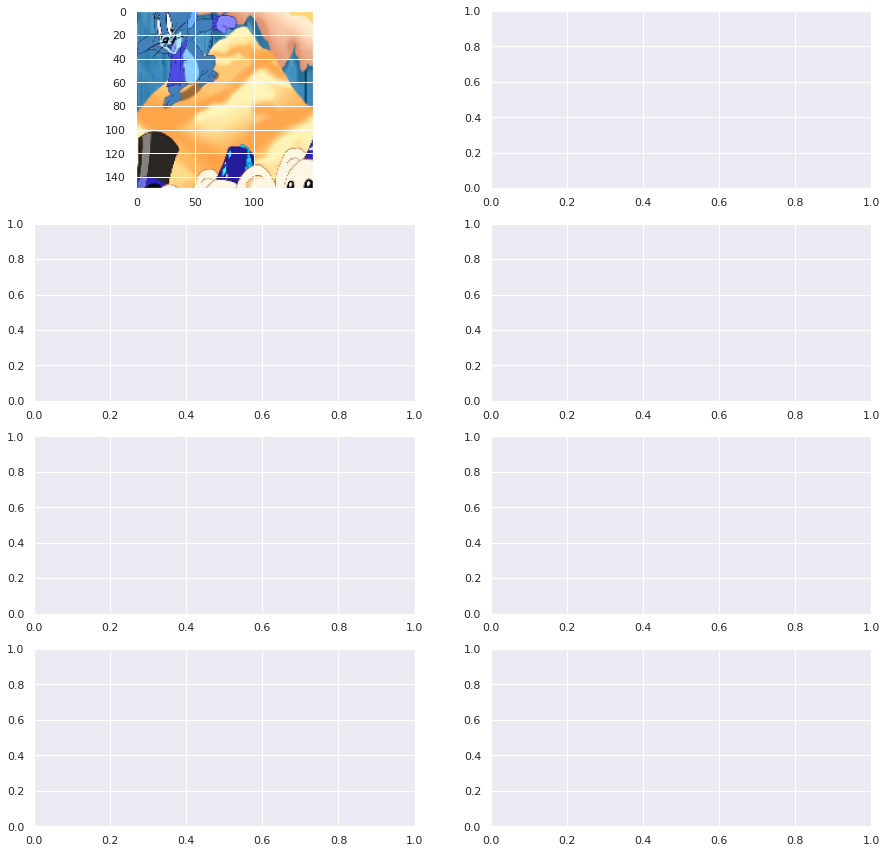

In [84]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Flower : "+str(le.inverse_transform(np.argmax([y_test[mis_class[count]]]))))
        plt.tight_layout()
        count+=1